In [14]:
import serial
import time
import csv

import re

def is_flexible_digit_comma_digit(s):
    pattern = r'^(-?\d*\.?\d+\s*,\s*)*-?\d*\.?\d+$'
    return bool(re.match(pattern, s))
 
with open('SensorData.csv', mode='a') as sensor_file:
    sensor_writer = csv.writer(sensor_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    # sensor_writer.writerow(["myICM.accX()", "myICM.accY()", "myICM.accZ()", "pitch_a", "roll_a", "pitch_a_LPF[n]", "pitch_g", "roll_g", "yaw_g", "pitch", "Xm", "Ym", "Zm", "x", "y", "yaw"])
    sensor_writer.writerow(["myICM.accX()", "myICM.accY()", "myICM.accZ()", "pitch_a", "roll_a"])

com = "COM7"
baud = 115200

x = serial.Serial(com, baud, timeout=0.1)
counter = 0
while x.isOpen() is True and counter < 1000:
    counter += 1
    data = x.readline().decode('utf-8').rstrip()
    if data != '':
        print(data)
        if is_flexible_digit_comma_digit(data):
            with open('SensorData_pitchrolla_y_rotriight.csv', mode='a') as sensor_file:
                numbers = data.split(', ')
                sensor_writer = csv.writer(sensor_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                sensor_writer.writerow(numbers)

Initialization of the sensor returned: All is well.
-1006.35, 31.74, 40.53, 38.07, -87.69
-988.28, 18.07, 46.39, 21.28, -87.31
-982.91, 16.11, 48.83, 18.26, -87.16
-991.70, 9.77, 42.97, 12.80, -87.52
-993.65, 24.90, 50.78, 26.12, -87.07
-990.23, 31.25, 55.18, 29.53, -86.81
-1004.88, 29.30, 44.43, 33.40, -87.47
-998.54, 30.27, 47.36, 32.59, -87.28
-984.86, 23.93, 48.83, 26.10, -87.16
-1002.93, 23.93, 52.25, 24.61, -87.02
-1016.60, 10.25, 45.41, 12.72, -87.44
-1001.46, 16.60, 49.32, 18.60, -87.18
-1003.91, 28.81, 55.18, 27.57, -86.85
-988.28, 25.88, 48.83, 27.92, -87.17
-1000.49, 25.39, 42.97, 30.58, -87.54
-998.05, 33.69, 51.27, 33.31, -87.06
-991.70, 28.81, 49.80, 30.05, -87.12
-986.82, 10.25, 39.55, 14.53, -87.70
-1001.95, 25.39, 46.88, 28.44, -87.32
-987.30, 19.04, 66.41, 16.00, -86.15
-997.56, 16.11, 43.46, 20.34, -87.51
-997.07, 26.37, 53.71, 26.15, -86.92
-1000.49, 20.51, 51.76, 21.61, -87.04
-1012.21, 26.37, 55.66, 25.35, -86.85
-995.12, 19.53, 49.80, 21.41, -87.13
-997.07, 35.64

In [15]:
x.close()

In [7]:
str = '139.65, -18.07, 1051.76, -0.98, 7.56, -0.20, 0.48, 4.77, 2.85, 0.33, -15.00, 0.30, 10.50, -0.62, -14.94, -92.39'
def is_flexible_digit_comma_digit(s):
    # 更新正则表达式以匹配不确定数量的数字，每个都可以是整数或浮点数
    pattern = r'^(-?\d*\.?\d+\s*,\s*)*-?\d*\.?\d+$'
    return bool(re.match(pattern, s))
bb = is_flexible_digit_comma_digit(str)
print(bb)

True


Selected column average value: -86.76915747241726


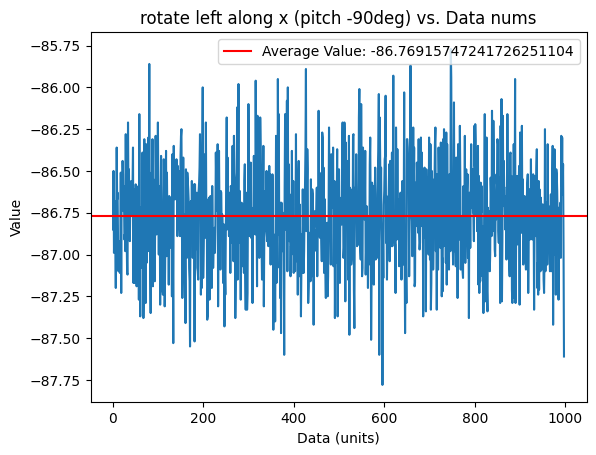

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_x_rotleft.csv'
column_index = 3
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[3]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('rotate left along x (pitch -90deg) vs. Data nums')
plt.show()

Selected column average value: 87.0210330992979


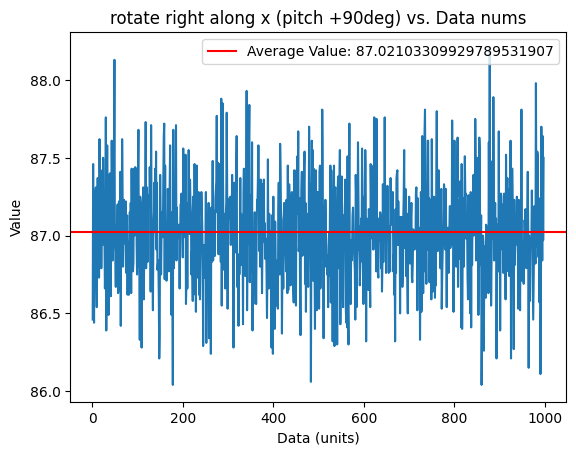

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_x_rotright.csv'
column_index = 3
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[3]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('rotate right along x (pitch +90deg) vs. Data nums')
plt.show()

Selected column average value: -0.005667001003009033


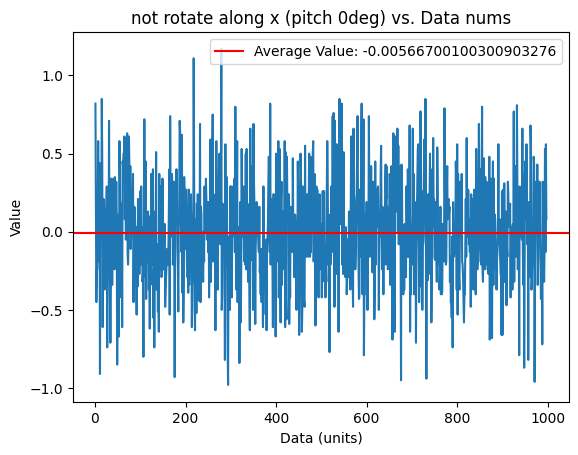

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_x_rot0.csv'
column_index = 3
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[3]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('not rotate along x (pitch 0deg) vs. Data nums')
plt.show()

Selected column average value: 86.37309929789367


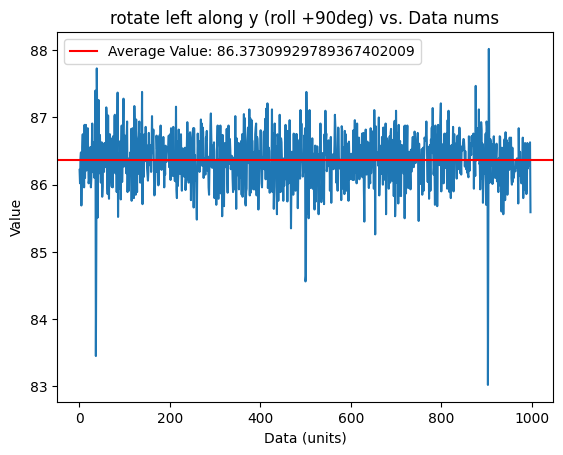

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_y_rotleft.csv'
column_index = 4
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[4]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('rotate left along y (roll +90deg) vs. Data nums')
plt.show()

Selected column average value: -87.1555421686747


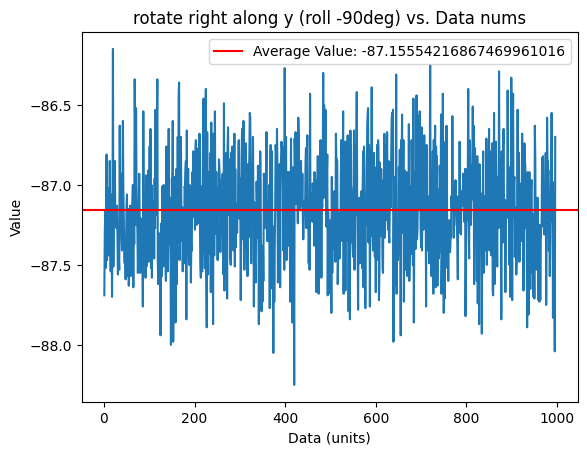

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_y_rotriight.csv'
column_index = 4
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[4]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('rotate right along y (roll -90deg) vs. Data nums')
plt.show()

Selected column average value: -0.058475426278836506


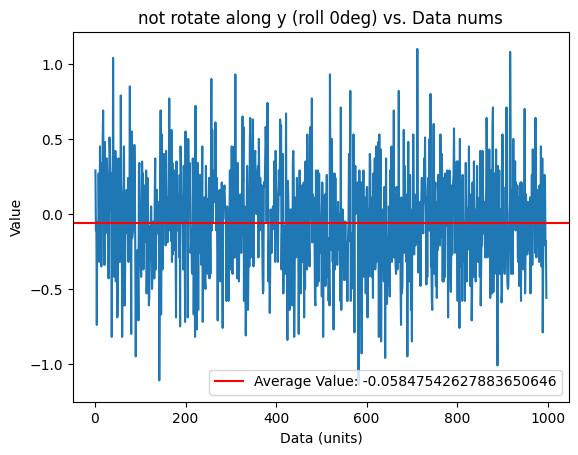

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'SensorData_pitchrolla_y_rot0.csv'
column_index = 4
data = pd.read_csv(file_path, header=None, usecols=[column_index])
x = range(1, len(data) + 1)
average_value = data.mean()[4]
print(f"Selected column average value: {average_value}")
plt.plot(x, data)
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average Value: {average_value:.20f}')
plt.legend()
plt.xlabel('Data (units)')
plt.ylabel('Value')
plt.title('not rotate along y (roll 0deg) vs. Data nums')
plt.show()